In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/sample_data/creditworthiness.csv"
df = pd.read_csv(path, delimiter=",")

# Display the DataFrame
df.head()

,ID,CC_LIMIT_CAT,EDUCATION,MARITAL_STATUS,GENDER,AGE_GROUP,pay_status_1,pay_status_2,pay_status_3,pay_status_4,...,_tpm,_ppm,_RETAIL,_URBAN,_RURAL,_PREMIUM,_TREATMENT,_LTV,_CC_LIMIT,_risk_score
0,1,0,2,2,2,0,2,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.000000
1,2,3,2,1,2,1,-1,2,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.028792
2,3,2,2,1,2,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.166089
3,4,1,2,2,2,1,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.579180
4,5,1,2,2,1,0,-1,0,-1,0,...,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,0.382920


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Define 'IS_DEFAULT' as the target variable
target = df['IS_DEFAULT']

# Select features (excluding 'IS_DEFAULT') for training
features = df.drop('IS_DEFAULT', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
print("all repayment delays\n",
df[df.IS_DEFAULT==1]._TREATMENT.\
value_counts())
print("number of women/men\n",df.GENDER.value_counts())
print("number of women/men with repayment delay\n",
df[df.IS_DEFAULT==1].GENDER.\
value_counts())
print("Percentage of women/men with repayment delay\n",df[df.IS_DEFAULT==1].GENDER.\
value_counts()/df.GENDER.value_counts())


all repayment delays
 -1    6335
 0      96
 2      87
 1      62
 3      56
Name: _TREATMENT, dtype: int64
number of women/men
 2    18112
1    11888
Name: GENDER, dtype: int64
number of women/men with repayment delay
 2    3763
1    2873
Name: GENDER, dtype: int64
Percentage of women/men with repayment delay
 2    0.207763
1    0.241672
Name: GENDER, dtype: float64


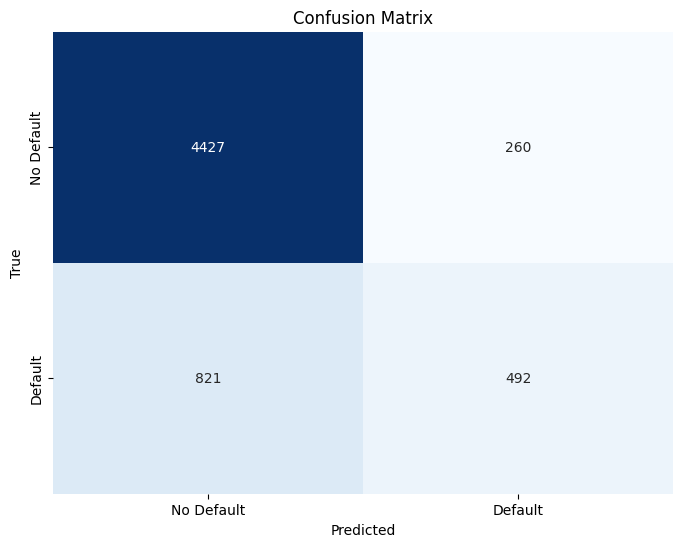

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace this with your actual model



# Train a classifier (replace this with your actual model)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install matplotlib seaborn scikit-learn


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already split your data into features (X) and target (y)
# using X_train, X_test, y_train, y_test from the previous example

# Define class weights (0.9 for the positive class and 0.1 for the negative class)
class_weights = [0.1, 0.9]

# Create and train the CatBoostClassifier with class weights
classifier = CatBoostClassifier(class_weights=class_weights, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Learning rate set to 0.040021
0:	learn: 0.6760241	total: 121ms	remaining: 2m
1:	learn: 0.6592495	total: 176ms	remaining: 1m 27s
2:	learn: 0.6446750	total: 229ms	remaining: 1m 16s
3:	learn: 0.6312176	total: 261ms	remaining: 1m 5s
4:	learn: 0.6188561	total: 292ms	remaining: 58.1s
5:	learn: 0.6083134	total: 319ms	remaining: 52.9s
6:	learn: 0.5983150	total: 378ms	remaining: 53.6s
7:	learn: 0.5896418	total: 446ms	remaining: 55.3s
8:	learn: 0.5816130	total: 489ms	remaining: 53.8s
9:	learn: 0.5737508	total: 532ms	remaining: 52.7s
10:	learn: 0.5666724	total: 573ms	remaining: 51.5s
11:	learn: 0.5605901	total: 614ms	remaining: 50.6s
12:	learn: 0.5548715	total: 654ms	remaining: 49.7s
13:	learn: 0.5491159	total: 679ms	remaining: 47.9s
14:	learn: 0.5439116	total: 705ms	remaining: 46.3s
15:	learn: 0.5398859	total: 732ms	remaining: 45s
16:	learn: 0.5359506	total: 762ms	remaining: 44.1s
17:	learn: 0.5319687	total: 791ms	remaining: 43.2s
18:	learn: 0.5282128	total: 820ms	remaining: 42.3s
19:	learn: 0.5

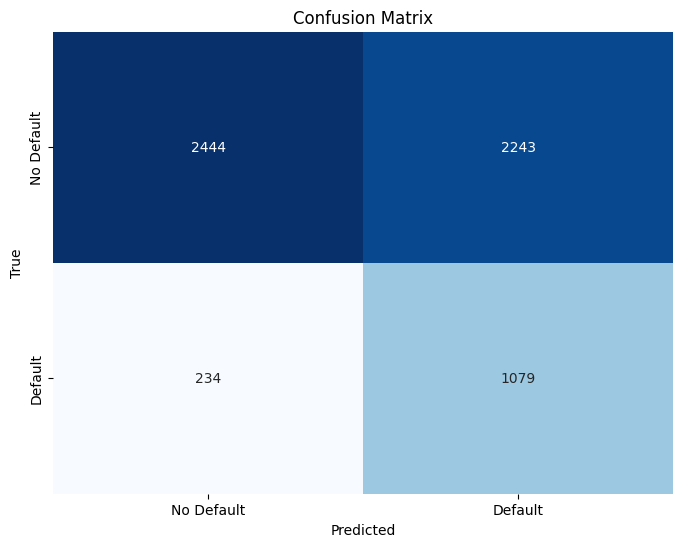

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into features (X) and target (y)
# using X_train, X_test, y_train, y_test from the previous examples

# Standard CatBoostClassifier without class weights
classifier_standard = CatBoostClassifier(random_state=42)
classifier_standard.fit(X_train, y_train)
y_pred_standard = classifier_standard.predict(X_test)

# CatBoostClassifier with specified class weights
class_weights = [0.1, 0.9]
classifier_weighted = CatBoostClassifier(class_weights=class_weights, random_state=42)
classifier_weighted.fit(X_train, y_train)
y_pred_weighted = classifier_weighted.predict(X_test)
# Evaluate and compare the results
print("Results with Standard Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_standard))
print("Classification Report:\n", classification_report(y_test, y_pred_standard))

print("\nResults with Specified Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))

Learning rate set to 0.040021
0:	learn: 0.6716511	total: 15.6ms	remaining: 15.6s
1:	learn: 0.6513133	total: 62.1ms	remaining: 31s
2:	learn: 0.6331425	total: 102ms	remaining: 34s
3:	learn: 0.6166914	total: 131ms	remaining: 32.5s
4:	learn: 0.6011012	total: 157ms	remaining: 31.2s
5:	learn: 0.5870733	total: 209ms	remaining: 34.6s
6:	learn: 0.5742057	total: 241ms	remaining: 34.2s
7:	learn: 0.5622300	total: 272ms	remaining: 33.7s
8:	learn: 0.5520732	total: 319ms	remaining: 35.1s
9:	learn: 0.5426363	total: 361ms	remaining: 35.7s
10:	learn: 0.5335385	total: 386ms	remaining: 34.7s
11:	learn: 0.5254868	total: 416ms	remaining: 34.2s
12:	learn: 0.5181611	total: 454ms	remaining: 34.5s
13:	learn: 0.5113227	total: 522ms	remaining: 36.8s
14:	learn: 0.5048368	total: 577ms	remaining: 37.9s
15:	learn: 0.4994416	total: 642ms	remaining: 39.5s
16:	learn: 0.4942028	total: 700ms	remaining: 40.5s
17:	learn: 0.4893142	total: 752ms	remaining: 41s
18:	learn: 0.4851601	total: 806ms	remaining: 41.6s
19:	learn: 0.48

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
import pandas as pd

# Assuming you have already split your data into features (X) and target (y)
# using X_train, X_test, y_train, y_test from the previous examples

# Concatenate X_train and y_train for reweighing
train_data = pd.concat([X_train, y_train], axis=1)

# Use RandomUnderSampler to balance the class distribution
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Create a BalancedBaggingClassifier with RandomUnderSampler
bbc = BalancedBaggingClassifier(random_state=42, n_jobs=-1, base_estimator=None)

# Create a pipeline with RandomUnderSampler and BalancedBaggingClassifier
pipeline = make_pipeline(rus, bbc)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4687
           1       0.41      0.59      0.48      1313

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
import pandas as pd

# Assuming you have already split your data into features (X) and target (y)
# using X_train, X_test, y_train, y_test from the previous examples

# Concatenate X_train and y_train for reweighing
train_data = pd.concat([X_train, y_train], axis=1)

# Use RandomUnderSampler to balance the class distribution
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Create a BalancedBaggingClassifier with RandomUnderSampler
bbc = BalancedBaggingClassifier(random_state=42, n_jobs=-1, base_estimator=None)

# Create a pipeline with RandomUnderSampler and BalancedBaggingClassifier
pipeline = make_pipeline(rus, bbc)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4687
           1       0.41      0.59      0.48      1313

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
import pandas as pd

# Assuming you have already split your data into features (X) and target (y)
# using X_train, X_test, y_train, y_test from the previous examples

# Model without reweighting
classifier_without_reweighting = BalancedBaggingClassifier(random_state=42, n_jobs=-1, base_estimator=None)
classifier_without_reweighting.fit(X_train, y_train)
y_pred_without_reweighting = classifier_without_reweighting.predict(X_test)

# Model with reweighting
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
bbc_with_reweighting = BalancedBaggingClassifier(random_state=42, n_jobs=-1, base_estimator=None)
pipeline_with_reweighting = make_pipeline(rus, bbc_with_reweighting)
pipeline_with_reweighting.fit(X_train, y_train)
y_pred_with_reweighting = pipeline_with_reweighting.predict(X_test)

# Print classification reports for both models
print("Classification Report without Reweighting:\n", classification_report(y_test, y_pred_without_reweighting))
print("\nClassification Report with Reweighting:\n", classification_report(y_test, y_pred_with_reweighting))


Classification Report without Reweighting:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4687
           1       0.47      0.52      0.49      1313

    accuracy                           0.77      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.78      0.77      0.77      6000


Classification Report with Reweighting:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4687
           1       0.41      0.59      0.48      1313

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



In [ ]:
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
import pandas as pd

# Assuming you have already split your data into features (X) and target (y)
# using X_train, X_test, y_train, y_test from the previous examples

# Concatenate X_train and y_train for fairness processing
train_data = pd.concat([X_train, y_train], axis=1)

# Define the sensitive feature (e.g., 'GENDER')
sensitive_feature = 'GENDER'

# Define the model (e.g., RandomForestClassifier)
model = RandomForestClassifier()

# Define the Prejudice Remover algorithm with the chosen fairness constraint (e.g., Demographic Parity)
prejudice_remover = ExponentiatedGradient(model,
                                          constraints=DemographicParity())

# Train the Prejudice Remover on the training data
prejudice_remover.fit(X_train, y_train, sensitive_features=X_train[sensitive_feature])

# Make predictions on the test set
y_pred = prejudice_remover.predict(X_test)

# Evaluate the model's fairness and performance
metric_frame = MetricFrame(metrics={"accuracy": selection_rate,
                                    "demographic_parity": demographic_parity_difference},
                           sensitive_features=X_test[sensitive_feature],
                           y_true=y_test,
                           y_pred=y_pred)

print("Metric Frame:\n", metric_frame.by_group)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


TypeError: demographic_parity_difference() missing 1 required keyword-only argument: 'sensitive_features'

In [ ]:
!pip install aif360



In [ ]:
# Import the necessary libraries
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming you have the training and test data in X_train, X_test, y_train, y_test, and Z_test
# Replace Z_test with the actual variable representing the protected attribute in your dataset

# Fit a classifier to the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Get the predictions from the classifier
y_pred = clf.predict(X_test)

Z_test = X_test['gender']

# Create a BinaryLabelDataset from the test data and the predictions
bld = BinaryLabelDataset(favorable_label=1, unfavorable_label=0, labels=y_test, protected_attribute=Z_test)

# Fit the Equalized Odds Postprocessing algorithm
eop = EqOddsPostprocessing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
eop = eop.fit(bld, y_pred)

# Use the post-processor to adjust the model's predictions on the test data
y_pred_adjusted = eop.predict(y_pred, bld)

# Evaluate the fairness and accuracy of the adjusted predictions
metric_orig = ClassificationMetric(bld, y_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_adjusted = ClassificationMetric(bld, y_pred_adjusted, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

# Print the fairness and accuracy metrics
print("Original model - disparate impact: ", metric_orig.disparate_impact())
print("Adjusted model - disparate impact: ", metric_adjusted.disparate_impact())
print("Original model - accuracy: ", metric_orig.accuracy())
print("Adjusted model - accuracy: ", metric_adjusted.accuracy())

